# Exercise 10
### $\textit{Confidence intervals}$

Given is the likelihood function for a measured value $x$ at a given parameter $a$

$L(X;a) = \frac{1}{\pi} \frac{1}{1+(x-a)^2}$ mit $a > 0$.

>**(a) Using the Neyman construction, determine the central frequentist $90 \%$ confidence interval for $a$
when a value $𝑥 = 10$ was measured.**

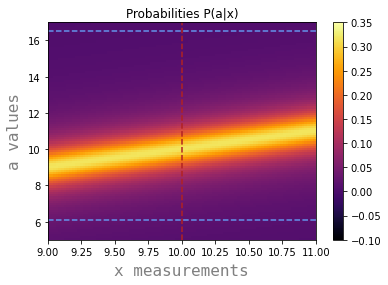

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

#heatmap configurations

x, a = np.meshgrid(np.linspace(9, 11, 100), np.linspace(5, 17, 100))
z = 1/(np.pi *(1+(x-a)**2)) #probability density

z = z[:-1, :-1]

fig, ax = plt.subplots()

c = ax.pcolormesh(x, a, z, cmap='inferno', vmin=-0.1, vmax=0.35)
ax.set_title('Probabilities P(a|x)')

ax.axis([x.min(), x.max(), a.min(), a.max()])

fig.colorbar(c, ax=ax)
plt.xlabel("x measurements", family='monospace', color='grey', weight='normal', size = 16, labelpad = 6)
plt.ylabel("a values", family='monospace', color='grey', weight='normal', size = 16, labelpad = 6)
plt.axhline(y=6.11232, color='cornflowerblue', linestyle='dashed')
plt.axhline(y=16.524001, color='cornflowerblue', linestyle='dashed')
plt.axvline(x = 10, color='firebrick', linestyle='dashed')

plt.show()

The heatmap plot shows the probabilities of $a$ for certain measurements of $x$. The blue dashed lines are the confidence interval of $a$ for $x=10$, which are calculated in the following. The red dashed line is for $x=10$.

89.99998998663591


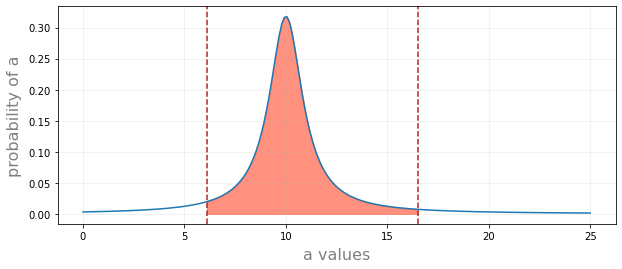

In [2]:
def f(n, x=10):
    return 1/(np.pi *(1+(x-n)**2))

#determining the confidence interval

I = quad(f, 0, np.inf)
I_005 = I[0]*0.05

int_oben = 16.524001
int_unten = 6.11232

I_unten = quad(f, 0, int_unten)
I_oben = quad(f, int_oben, np.inf)
I_ = quad(f, int_unten, int_oben)
Iges = I_[0]/I[0] * 100 #normieren

print(Iges)

#plot

plt.figure(figsize=(10, 4))

b = np.linspace(0, 25, 200)
plt.plot(b,f(b)) 
plt.xlabel("a values", color='grey', weight='normal', size = 16, labelpad = 6)
plt.ylabel("probability of a", color='grey', weight='normal', size = 16, labelpad = 6)

k = np.arange(int_unten, int_oben, 0.1)

plt.fill_between(k, f(k), color='tomato', alpha=.7)
plt.grid( alpha=.2)

plt.axvline(x=int_unten, color='firebrick', linestyle='dashed')
plt.axvline(x=int_oben, color='firebrick', linestyle='dashed')

plt.show()



The integral of the probability function is analytically determined and equals to:

$P(x;a) = \frac{1}{\pi} arctan(x-a)$
The full area under the function for x = 10 is given by:


In [13]:
p = (1/ np.pi) * ( np.arctan(np.NINF) - np.arctan(10) )
print(np.absolute(p))
print(0.05*np.absolute(p))

0.9682744825694465
0.04841372412847233



$| \frac{1}{\pi} \left( \arctan(-\infty) - \arctan(10) \right) | = | - \frac{1}{\pi} \frac{\pi}{2} - \frac{1}{\pi} 1.4711276743037 | = 0.9682744825694465$

Since we want the central 90% of the area under the curve, we need to determine for which intervall the left and right edges of the area equal to 5% of the total area. This equals to $0.04841372412847233$.

In [32]:
from sympy import nsolve, atan, oo, pi

l = symbols('l')
p_unten = nsolve((1/ pi) * ( atan(10-l) - atan(10)) - 0.04841372412847233 == 0,l)

AttributeError: 'bool' object has no attribute 'free_symbols'

The interval for which the parameter $a$ lies in with $90\%$ confidence for the measured $x$ value of $10$ is $a\in [6.11232, 16.524001]$.

(b) Assuming a uniform prior distribution in $a$, determine the central Bayesian credibility interval.
(Both sides outside the central confidence interval have the same probability content).